In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
# Reading the csv file
df = pd.read_csv(r'C:\Users\ewu\OneDrive - Healthfirst\Desktop\data analytic course\assignment\caps\data\Capstone Assist Line Data Csv.csv', encoding='latin-1')


C:\Users\ewu\AppData\Local\Temp\ipykernel_26100\2458292384.py:2: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ewu\OneDrive - Healthfirst\Desktop\data analytic course\assignment\caps\data\Capstone Assist Line Data Csv.csv', encoding='latin-1')


In [32]:
df.head(5)

,Assist Line,Workgroup,Caller with Customer,LOB,SSA/TL Takeover Required,Coaching Needed,Comments,Reason,Reason Sub-Type,Supervisor Call,Created,Created By,Created Month,Modified,System Access Resolved,Orig_Created,De-Escalation Attempted
0,Assist Line,SGQ Assist Line,Yes,01 - Medicaid/HARP,No,No,legal department phone number,Other/Agent Issues,Transfer Assistance/Extensions,NaN,2020-10-28,"Yates, Antoiniesha",2020-10 Oct,10/28/2020 9:40,NaN,NaN,NaN
1,Assist Line,CNX - Assist Line,No,01 - Medicaid/HARP,No,Yes,Agent is asking assistance for manual PCP chan...,PCP Changes,Manual Change (MHS) / Salesforce Error,No,2022-05-27,"Daculan, Bernadette",2022-05 May,5/27/2022 10:46,NaN,NaN,NaN
2,Assist Line,SGQ Assist Line,Yes,Not Available,Yes,Yes,requested American supervisor refused to speak...,Supervisor Call,Request to speak w/ Supervisor,Yes,2022-05-27,"Ruiz, Melissa",2022-05 May,5/27/2022 10:50,NaN,NaN,NaN
3,Assist Line,CNX - Assist Line,No,01 - Medicaid/HARP,No,Yes,Agent is looking for a supervisor.. Advise age...,Other/Agent Issues,No Assistance Needed / Agent Disconnect,No,2022-05-27,"Daculan, Bernadette",2022-05 May,5/27/2022 10:52,NaN,NaN,NaN
4,Assist Line,Auth Intake Assist Line,Yes,01 - Medicaid/HARP,No,No,Agent called for assistance with PNOF that was...,Authorization,Other (Please comment details),No,2022-05-27,"Quintero, Renny Alejandro",2022-05 May,5/27/2022 10:58,NaN,NaN,NaN


In [33]:
#explore # of rows and columns
df.shape

(232377, 17)

In [34]:
#explore data types
df.dtypes

Assist Line                 object
Workgroup                   object
Caller with Customer        object
LOB                         object
SSA/TL Takeover Required    object
Coaching Needed             object
Comments                    object
Reason                      object
Reason Sub-Type             object
Supervisor Call             object
Created                     object
Created By                  object
Created Month               object
Modified                    object
System Access Resolved      object
Orig_Created                object
De-Escalation Attempted     object
dtype: object

# Prepping & Cleaning the Data

In [35]:
#these are the columns I will be working with , will check on the quality of the data

df2 = df[['Orig_Created','Created','LOB', 'Reason', 'Reason Sub-Type', 'Supervisor Call', 'SSA/TL Takeover Required', 'De-Escalation Attempted', 'Comments', ]]

In [25]:
#check total null values
df2.isnull().sum()

Orig_Created                129416
Created                          0
LOB                          18862
Reason                           1
Reason Sub-Type                  1
Supervisor Call              56642
SSA/TL Takeover Required      1625
De-Escalation Attempted     187705
Comments                        22
dtype: int64

# Clean up the Date Columns -- original data owner said Orig_Created is the accurate date to use

In [36]:
# since large # of null shows in Ori_Created date, will replace any N/A with values from Created column
df2['Orig_Created'] = df2['Orig_Created'].fillna(df.pop('Created'))

C:\Users\ewu\AppData\Local\Temp\ipykernel_26100\833727582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Orig_Created'] = df2['Orig_Created'].fillna(df.pop('Created'))


In [38]:
#recheck null values in columns
df2.isnull().sum()

Orig_Created                     0
Created                          0
LOB                          18862
Reason                           1
Reason Sub-Type                  1
Supervisor Call              56642
SSA/TL Takeover Required      1625
De-Escalation Attempted     187705
Comments                        22
dtype: int64

In [39]:
#Since already clean up Orig_created date column, can drop "Created" Column
df2 = df2.drop('Created', axis=1)

In [40]:
#rename the columns
df2 = df2.rename(columns={'Orig_Created': 'InitialCreatedDate'})

# Extract only Month and Year

In [41]:
# convert the date column into a datetime object
df2['InitialCreatedDate'] = pd.to_datetime(df2['InitialCreatedDate'])

# extract the day, month, and year components
df2['Month'] = df2['InitialCreatedDate'].dt.month
df2['Year'] = df2['InitialCreatedDate'].dt.year

In [42]:
#checking to see what values are in Month
df2['Month'].unique()

array([10,  5,  6,  7,  8, 11,  9, 12,  1,  2,  3,  4])

In [43]:
# overwriting numerical month to month's spelling
df2['Month'] = df2['Month'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                                    ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
df2['Month']

0         October
1             May
2             May
3             May
4             May
           ...   
232372        May
232373        May
232374        May
232375        May
232376        May
Name: Month, Length: 232377, dtype: object

# Cleaning up LOB Column

In [44]:
#checking what unique values and the count
df2['LOB'].value_counts()

LOB
01 - Medicaid/HARP        46403
30 - Medicare             30457
Medicaid                  28426
Medicare                  22072
42 - QHP/EP               17101
QHP                       12781
Not Available             10120
34 - CompleteCare/FIDA     8265
Complete Care              6634
Provider Auth Intake       6536
CHP                        5144
EP                         4424
20 - CHP                   4081
02 - SHP                   3517
45 - HFIC                  2123
Commercial                 2039
SHP                        1841
HARP                        440
Claims Reprocessing         401
ALOB                        298
Provider Eligibility        195
Provider Escalations        143
40 - Commercial/HNY          74
Name: count, dtype: int64

In [45]:
#Since most LOB are duplicate, will combine it together

def update_lob(lob):
  if lob == "01 - Medicaid/HARP" or lob == "Medicaid" or lob == "Harp":
    return "Medicaid/Harp"
  if lob == "30 - Medicare" or lob == "Medicare":
    return "Medicare"
  if lob == "42 - QHP/EP" or lob == "QHP" or lob == "EP":
    return "QHP/EP"
  if lob == "Complete Care" or lob == "34 - CompleteCare/FIDA":
    return "CompleteCare"
  if lob == "CHP" or lob == "20 - CHP":
    return "CHP"
  if lob == "SHP" or lob == "02 - SHP":
    return "SHP"
  if lob == "Commercial" or lob == "45 - HFIC" or lob == "40 - Commercial/HNY":
    return "HFIC"
  if lob == "Provider Eligibility" or lob == "Provider Escalations":
    return "Provider"
  else:
    return "Unclassified"

df2['LOB'] = df2['LOB'].apply(update_lob)

# Cleaning up subtype reason

In [46]:
# total count of sub reason choices
df2['Reason Sub-Type'].nunique()

186

In [53]:
#recheck unique values
df2['Reason Sub-Type'].unique()

array(['Transfer Assistance/Extensions',
       'Manual Change (MHS) / Salesforce Error',
       'Request to speak w/ Supervisor',
       'No Assistance Needed / Agent Disconnect',
       'Other (Please comment details)', 'Creating an Auth',
       'Claim Denial Inquiry', 'Pharmacy Benefit/Coverage',
       'Escalated SGQ/Supervisor calls', 'EDS',
       'Provider Panel Discrepancy', 'Authorization Status Inquiry',
       'Member Payment/Card Issue', 'Resolution Letter Inquiry',
       'PCA Service/Hour Increase/M11Q', 'DME Eligibility/Coverage',
       'Locating Care Manager', 'OTC Card (Benefits/Replacement)',
       'Benefits Grid Navigation',
       'Demographic Update (Transfer NYSOH/HRA)',
       'Home Care Eligibility/Coverage', 'Member Portal', 'CDPAS Inquiry',
       'Editing Existing Authorization', 'Care Management/PCM',
       'Explanation of Benefit/Coverage', 'Outreach/Return Calls',
       'Assistance Locating Policy/Job Aid',
       'Appeal - Checking Appeal Status', 'B

In [47]:
#grouping all similar subtype: Supervisor into 1
df2[
    (df2['Reason Sub-Type'] == "Supervisor call")
    | (df2['Reason Sub-Type'] == "Request to speak w/ Supervisor")
    | (df2['Reason Sub-Type'] == "Escalated SGQ/Supervisor calls")
].replace('Supervisor Call', inplace=True)

# Cleaning up Reason/Comment Columns

In [48]:
#remove all null values in Reason/Comment Columns -- without Comment, there is no added value to data
df2.dropna(subset = ['Reason', 'Comments'], inplace=True)

In [49]:
#recheck null values in columns
df2.isnull().sum()

InitialCreatedDate               0
LOB                              0
Reason                           0
Reason Sub-Type                  0
Supervisor Call              56634
SSA/TL Takeover Required      1620
De-Escalation Attempted     187684
Comments                         0
Month                            0
Year                             0
dtype: int64

In [50]:
#replace null value with unknown
df2['Supervisor Call'].fillna('Unknown', inplace=True)

In [51]:
#replace null value with unknown
df2['SSA/TL Takeover Required'].fillna('Unknown', inplace=True)

In [52]:
#replace null value with unknown
df2['De-Escalation Attempted'].fillna('Unknown', inplace=True)

In [53]:
# last recheck null values in columns
df2.isnull().sum()

InitialCreatedDate          0
LOB                         0
Reason                      0
Reason Sub-Type             0
Supervisor Call             0
SSA/TL Takeover Required    0
De-Escalation Attempted     0
Comments                    0
Month                       0
Year                        0
dtype: int64

In [54]:
df2.dtypes

InitialCreatedDate          datetime64[ns]
LOB                                 object
Reason                              object
Reason Sub-Type                     object
Supervisor Call                     object
SSA/TL Takeover Required            object
De-Escalation Attempted             object
Comments                            object
Month                               object
Year                                 int32
dtype: object

In [55]:
#changing from objec to cateogry type
df2[['LOB', 'Reason', 'Reason Sub-Type','Supervisor Call', 'SSA/TL Takeover Required', 'De-Escalation Attempted', 'Comments']].astype('category')

,LOB,Reason,Reason Sub-Type,Supervisor Call,SSA/TL Takeover Required,De-Escalation Attempted,Comments
0,Medicaid/Harp,Other/Agent Issues,Transfer Assistance/Extensions,Unknown,No,Unknown,legal department phone number
1,Medicaid/Harp,PCP Changes,Manual Change (MHS) / Salesforce Error,No,No,Unknown,Agent is asking assistance for manual PCP chan...
2,Unclassified,Supervisor Call,Request to speak w/ Supervisor,Yes,Yes,Unknown,requested American supervisor refused to speak...
3,Medicaid/Harp,Other/Agent Issues,No Assistance Needed / Agent Disconnect,No,No,Unknown,Agent is looking for a supervisor.. Advise age...
4,Medicaid/Harp,Authorization,Other (Please comment details),No,No,Unknown,Agent called for assistance with PNOF that was...
...,...,...,...,...,...,...,...
232372,Medicaid/Harp,Care Management/PCM,Clinical Inquiries Guide,No,No,Unknown,SA askign assistance with membe calling with D...
232373,Unclassified,Authorization,Editing Existing Authorization,No,No,Unknown,agent asked if she can submit extension throug...
232374,Medicare,Supervisor Call,Request to speak w/ Supervisor,No,No,Unknown,Reason: member received a bill DOS 07/19/2021 ...
232375,CompleteCare,Benefits/Eligibility,Other (Please comment details),No,No,Unknown,Agent needed help with free phone application ...


In [56]:
# Rename df2 to df3
df3 = df2

# Save the DataFrame to a CSV file to be download into computer
df = pd.read_csv(r'C:\Users\ewu\OneDrive - Healthfirst\Desktop\data analytic course\assignment\caps\data\Capstone Assist Line Data Csv.csv', encoding='latin-1')

df3.to_csv('asslineclean.csv')

C:\Users\ewu\AppData\Local\Temp\ipykernel_26100\1348134842.py:5: DtypeWarning: Columns (14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ewu\OneDrive - Healthfirst\Desktop\data analytic course\assignment\caps\data\Capstone Assist Line Data Csv.csv', encoding='latin-1')


# Explore Findings

In [57]:
#Stat1: Explore Top Call Reason
df4= df2['Reason']
df4= df2.groupby(['Reason'])['Reason Sub-Type'].count().rename('Reason Count').sort_values(ascending=False)
df4

Reason
Supervisor Call                     70407
Benefits/Eligibility                30297
Authorization                       23650
Other/Agent Issues                  21356
Payments                            19113
Claims                              11854
Process Understanding / Research    10395
Enrollment / Account Update          9618
PCP Changes                          9022
Care Management/PCM                  6794
Appeal/Grievance                     6063
Forms/Communication                  5992
System Access                        4020
System Navigation                    2895
Provider Request                      196
Benefits                              172
Authorization/Claims                  115
-                                      95
Research/Process Understanding         94
Other (Please comment details)         89
Forms/Auths/Reviews                    42
Sending Requests/Reviews               26
Navigation Issues                      14
Case Documentation/Forms   

In [58]:
#Stat2: Explore Top Call Reason
df5 = df2[(df2['Reason'] == "Supervisor Call") & (df2['Supervisor Call'] == "Yes") & (df2['Reason Sub-Type'] == "Supervisor Call")]
df5= df2.groupby(['Reason'])['Reason Sub-Type'].count().rename('Reason Count').sort_values(ascending=False)
df5

Reason
Supervisor Call                     70407
Benefits/Eligibility                30297
Authorization                       23650
Other/Agent Issues                  21356
Payments                            19113
Claims                              11854
Process Understanding / Research    10395
Enrollment / Account Update          9618
PCP Changes                          9022
Care Management/PCM                  6794
Appeal/Grievance                     6063
Forms/Communication                  5992
System Access                        4020
System Navigation                    2895
Provider Request                      196
Benefits                              172
Authorization/Claims                  115
-                                      95
Research/Process Understanding         94
Other (Please comment details)         89
Forms/Auths/Reviews                    42
Sending Requests/Reviews               26
Navigation Issues                      14
Case Documentation/Forms   

In [59]:
#Stat2: Granulated level: of those Supervisor call reason, how many required a takeover   --- discover that SUP call reason and Supervisor call is similar : can we take out SUP Call question
df6 = df2[(df2['Reason'] == "Supervisor Call") & (df2['Supervisor Call'] == "Yes")]

df6 = df6.groupby(['Year', 'SSA/TL Takeover Required'])['SSA/TL Takeover Required'].count().rename('Takeover Count')
df6

Year  SSA/TL Takeover Required
2021  No                            712
      Yes                          4703
2022  No                           1730
      Unknown                         2
      Yes                         10098
2023  No                           2831
      Unknown                        83
      Yes                         25684
2024  No                            802
      Unknown                        19
      Yes                         12079
Name: Takeover Count, dtype: int64

In [60]:
#Stat3: Highly Granulated level: of those SUP calls that were taken over, how many agents tried to de-escalated prior to transfer
df7 = df2[(df2['Reason'] == "Supervisor Call") & (df2['Supervisor Call'] == "Yes") &  (df2['SSA/TL Takeover Required'] == "Yes") & (df2['Reason Sub-Type'] == "Request to speak w/ Supervisor") &(df2['De-Escalation Attempted'] == "Yes") ]

df7 = df7.groupby(['Year', 'De-Escalation Attempted'])['De-Escalation Attempted'].count().rename('Descalation Count').reset_index()
df7

,Year,De-Escalation Attempted,Descalation Count
0,2023,Yes,3270
1,2024,Yes,8275


In [61]:
#Stat4: Highly Granulated level: of those SUP calls that were taken over, how many agents did not de-escalated prior to transfer
df8 = df2[(df2['Reason'] == "Supervisor Call") & (df2['Supervisor Call'] == "Yes") & (df2['SSA/TL Takeover Required'] == "Yes")  & (df2['Reason Sub-Type'] == "Request to speak w/ Supervisor")& (df2['De-Escalation Attempted'] == "No")]

df8 = df8.groupby(['Year', 'De-Escalation Attempted'])['De-Escalation Attempted'].count().rename('Descalation Count').reset_index()
df8

,Year,De-Escalation Attempted,Descalation Count
0,2023,No,1151
1,2024,No,3187


In [62]:
#stat5:  Finding out approxiamelty  when the De-escalation attempt was utilized  == Finding: De-escalation was added/utilized starting October 2023
df9 = df2[df2['De-Escalation Attempted']!='Unknown']

df9 = df9.groupby(['Year', 'Month'])['Month'].count().rename('Month Count').reset_index().sort_values(by='Month', ascending=False)

df9

,Year,Month,Month Count
2,2023,October,1198
1,2023,November,6248
7,2024,May,3282
6,2024,March,6276
5,2024,January,8056
4,2024,February,6882
0,2023,December,6715
3,2024,April,6014


In [63]:
#Stat6: Highly Granulated level: of those SUP calls that were taken over, what LOB called the most
df10 = df2[(df2['Reason'] == "Supervisor Call") & (df2['Supervisor Call'] == "Yes") & (df2['Reason Sub-Type'] == "Request to speak w/ Supervisor") & (df2['SSA/TL Takeover Required'] == "Yes")& (df2['De-Escalation Attempted'] == "Yes")]

df10 = df10.groupby(['Year','LOB'])['De-Escalation Attempted'].count().rename('LOB Count').reset_index()
df10 = pd.DataFrame(df10)
df10

,Year,LOB,LOB Count
0,2023,CHP,165
1,2023,CompleteCare,209
2,2023,HFIC,41
3,2023,Medicaid/Harp,1354
4,2023,Medicare,734
5,2023,QHP/EP,586
6,2023,SHP,47
7,2023,Unclassified,134
8,2024,CHP,342
9,2024,CompleteCare,596


# Keywords Search

In [64]:
#Only searching for keywords where calls were transfer to Senior/TL due to SUP calls and were previously escalated

key1 = df2[(df2['Reason'] == "Supervisor Call") & (df2['Supervisor Call'] == "Yes")  & (df2['Reason Sub-Type'] == "Request to speak w/ Supervisor")& (df2['De-Escalation Attempted'] == "Yes")]

# seperate comments into a seperate dataframe key2
key2= key1[['Comments']]


In [100]:
# Save the DataFrame to a CSV file to be download into computer
key2 = pd.read_csv(r'C:\Users\ewu\OneDrive - Healthfirst\Desktop\data analytic course\assignment\caps\data\keyword.csv', encoding='latin-1')


In [ ]:
# Keyword listing out the list by count (showing top 10)

!pip install wordcloud
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd


key2 = pd.read_csv(r'C:\Users\ewu\OneDrive - Healthfirst\Desktop\data analytic course\assignment\caps\data\keyword.csv', encoding='latin-1')

# Convert the 'Comments' column into a list of strings
comments_list = [comment.lower() for comment in key2['Comments'].tolist()]


# Join the strings into a single string
comments_string = ' '.join(comments_list)

# Split the string into a list of words
words = comments_string.split()

#customized word
stopwords_list2 = ['called', '||', '|', 'speak', 'took', 'advised', 'per', 'spoke', 'informed', 'hf', 'eoc', 'said', 'call.', 'ssa', 'sa','regarding', 'request', 'since', 'already', 'wanted', 'back', 'still', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '-', ',', 'assisted', 'adv', 'would', 'also', 'check', 'service', 'calling'  ]

# Convert the stopwords object to a list
stopwords_list = stopwords.words('english') + stopwords_list2

# Define the text variable
text = comments_string


# Get the most common words
most_common = pd.Series([word for word in words if word not in stopwords_list]).value_counts().sort_values(ascending=False)[:10]

# Assign the most common words to a new column in key3
key2['Common Words'] = most_common

# Now you can reference the most_common column
key4 = key2['Common Words']

print("20 Most Common words from Top 10 Occurences:")
print(most_common)

# Visualization

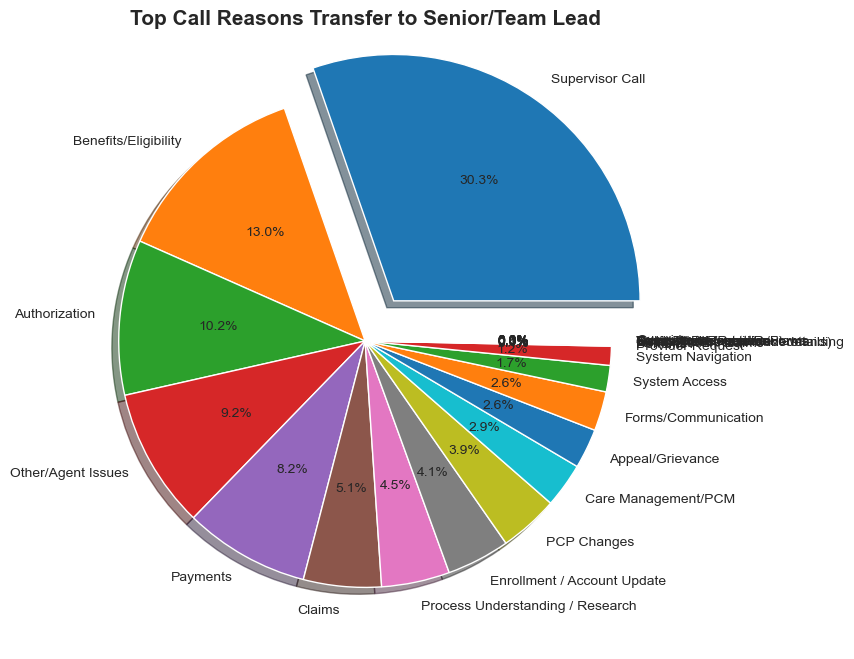

In [103]:
#graph1: (for Stat1) Explore top call reasons over the years in %

import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(15, 8))  # changing the size of the graph
y = np.array([70407,
30297,
23650,
21356,
19113,
11854,
10395,
9618,
9022,
6794,
6063,
5992,
4020,
2895,
196,
172,
115,
94,
89,
42,
26,
14,
12,
12,
8,
4])
mylabels = ['Supervisor Call', 'Benefits/Eligibility', 'Authorization', "Other/Agent Issues","Payments","Claims","Process Understanding / Research",'Enrollment / Account Update','PCP Changes',
'Care Management/PCM',
'Appeal/Grievance',
'Forms/Communication',
'System Access',
'System Navigation',
'Provider Request',
'Benefits',
'Authorization/Claims',
'Research/Process Understanding',
'Other (Please comment details)',
'Forms/Auths/Reviews',
'Sending Requests/Reviews',
'Navigation Issues',
'Case Documentation/Forms',
'Verification/Reception',
'Follow-Up/Information',
'Override']

myexplode = [0.2] + [0] * 25


plt.pie(y, labels=mylabels, explode=myexplode, shadow=True, autopct='%1.1f%%')
plt.title('Top Call Reasons Transfer to Senior/Team Lead',fontsize = 15, fontweight="bold")
plt.show()

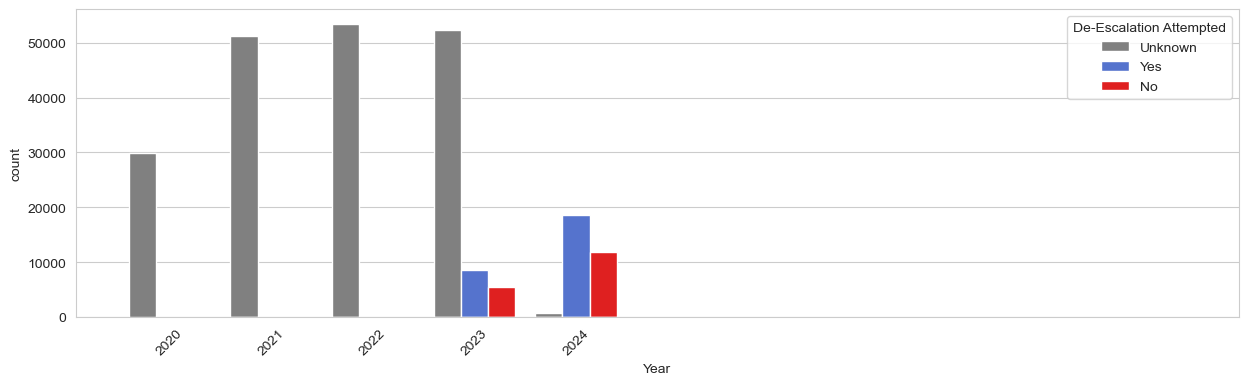

In [104]:
#graph 2: (De-escalation): noticed in df6 and df7 finding that there were no data of de-escalation prior to 2023. == We can see "Deescalation" question was added in 2023, prior to that, data not available whether agent deescalated or not.
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
plt.figure(figsize=(15, 4))
sns.countplot(x='Year', hue='De-Escalation Attempted', data=df2, color = 'blue', palette=['grey', 'royalblue', 'red'])

plt.xticks(rotation=45)
plt.barh(10, width=10, height=20, color='black')
plt.show()
plt.show()

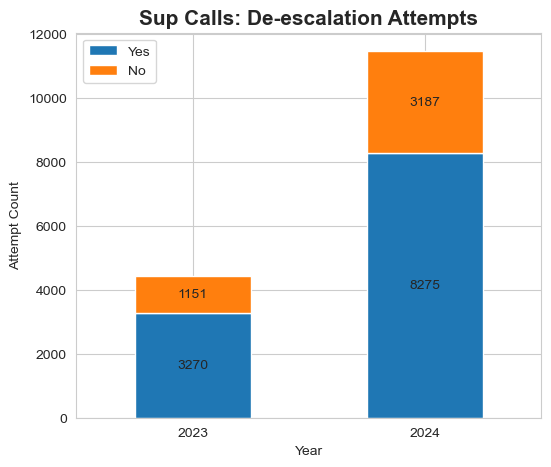

In [106]:
#Graph3: (De-escalated call attempts by year (SUP call and required SR/TL takeover)
data = {'var': ['Yes', 'No'], '2023': [3270,1151], '2024': [8275, 3187]}
df11 = pd.DataFrame(data)
df11.set_index('var', inplace=True)

ax = df11.T.plot.bar(stacked=True, figsize=(6, 5), rot=0)


for c in ax.containers:
    ax.bar_label(c, label_type='center')
ax.legend(title='SA De-escalated attempt', fontsize='small')
plt.title('Sup Calls: De-escalation Attempts',fontsize = 15, fontweight="bold")
plt.xlabel('Year')
plt.ylabel('Attempt Count')
plt.legend()
plt.show()

C:\Users\ewu\AppData\Local\Temp\ipykernel_2692\406173299.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df10, x='LOB', y='LOB Count',


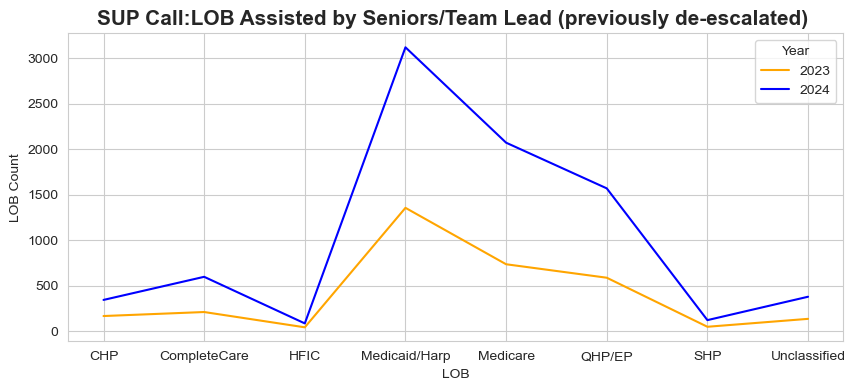

In [110]:
#Graph 4:  TOP LOB assisted by true SUp calls
plt.figure(figsize=(10,4))
sns.lineplot(data=df10, x='LOB', y='LOB Count',
                 hue='Year', ci=None, palette=["Orange", "Blue"])

plt.title('SUP Call:LOB Assisted by Seniors/Team Lead (previously de-escalated) ', fontsize = 15, fontweight="bold")
plt.xlabel('LOB')
plt.ylabel('LOB Count')
plt.legend(title='Year')

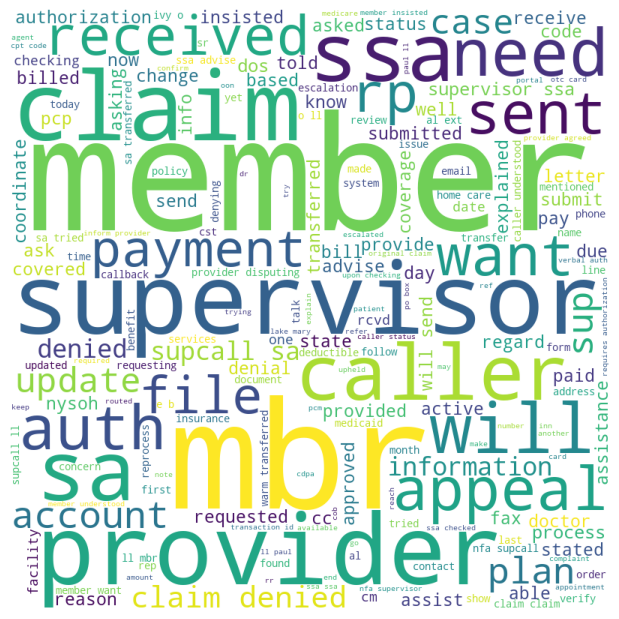

In [108]:
#Cloud 1: Identify the top callers from keywords

#customized keyword list - filter out stop word & customized list ( only using to ID the callers)
!pip install wordcloud
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads file
key2 = pd.read_csv(r'C:\Users\ewu\OneDrive - Healthfirst\Desktop\data analytic course\assignment\caps\data\keyword.csv', encoding='latin-1')

comment_words = ''

#customized word
# customized stopwords
stopwords_list2 = ['call', 'called', '||', '|', 'speak', 'took', 'advised', 'per', 'spoke', 'informed', 'hf', 'eoc', 'said', 'call.','regarding', 'request', 'since', 'already', 'wanted', 'back', 'still', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '-', ',', 'assisted', 'adv', 'would', 'also', 'check', 'service', 'calling'  ]

# combine default stopwords and customized stopwords
stopwords = set(STOPWORDS)
stopwords.update(stopwords_list2)

# iterate through the csv file
for val in key2.Comments:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

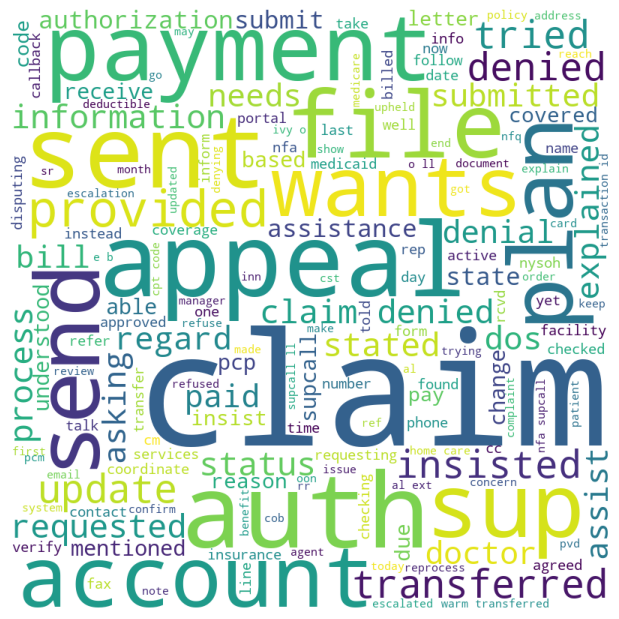

In [109]:
#Cloud 2: Identify the top reason from keywords

#customized keyword list - filter out stop word & customized list ( only using to ID the reasons)
!pip install wordcloud
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

#read file
key2 = pd.read_csv(r'C:\Users\ewu\OneDrive - Healthfirst\Desktop\data analytic course\assignment\caps\data\keyword.csv', encoding='latin-1')


comment_words = ''

#customized word
# customized stopwords
stopwords_list2 = ['supervisor', 'ssa', 'sa', 'mbr', 'provider', 'member', 'provide', 'need', 'asked', 'advise', 'try', 'rp', 'know', 'want', 'case', 'caller', 'transferred.', 'want', 'will', 'ask',
                  'received','call', 'called', '||', '|', 'speak', 'took', 'advised', 'per', 'spoke', 'informed', 'hf', 'eoc', 'said', 'call.', 'ssa', 'sa','regarding', 'request', 'since', 'already', 'wanted', 'back', 'still', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '-', ',', 'assisted', 'adv', 'would', 'also', 'check', 'service', 'calling'  ]

# combine default stopwords and customized stopwords
stopwords = set(STOPWORDS)
stopwords.update(stopwords_list2)

# iterate through the csv file
for val in key2.Comments:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

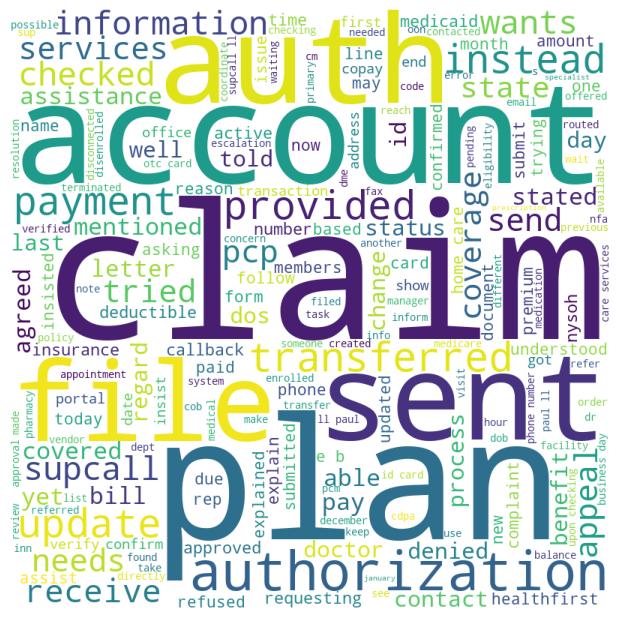

In [5]:
#cloud 3: further analysis (extracting top reason for members by only selecting keywords included "mbr or member")

#customized keyword list - filter out stop word & customized list ( only using to ID the reasons)
!pip install wordcloud
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads file
key3 = pd.read_csv('keyword.csv')

#filter out only for mbr
key4 = key3[key3['Comments'].str.contains('Member' or 'mbr')] 

comment_words = ''

#customized word
# customized stopwords
stopwords_list2 = ['supervisor', 'ssa', 'sa', 'mbr', 'provider', 'member', 'provide', 'need', 'asked', 'advise', 'try', 'rp', 'know', 'want', 'case', 'caller', 'transferred.', 'want', 'will', 'ask',
                  'received', 'requested', 'call', 'called', '||', '|', 'speak', 'took', 'advised', 'per', 'spoke', 'informed', 'hf', 'eoc', 'said', 'call.', 'ssa', 'sa','regarding', 'request', 'since', 'already', 'wanted', 'back', 'still', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '-', ',', 'assisted', 'adv', 'would', 'also', 'check', 'service', 'calling'  ]

# combine default stopwords and customized stopwords
stopwords = set(STOPWORDS)
stopwords.update(stopwords_list2)

# iterate through the csv file
for val in key4.Comments:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

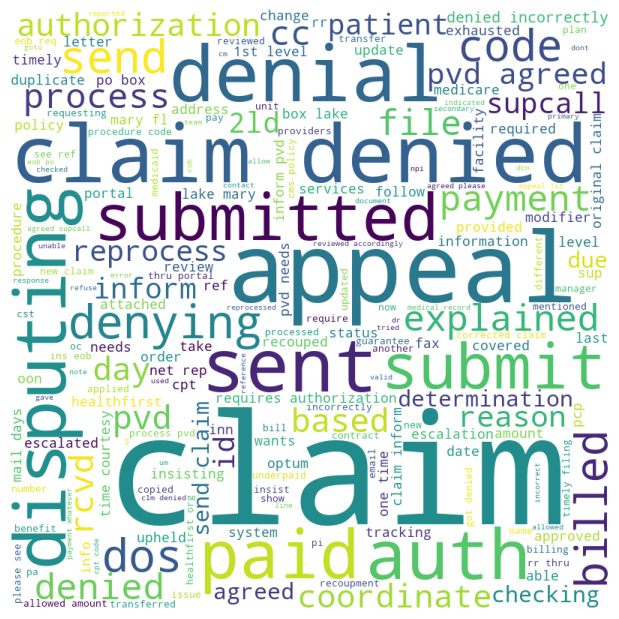

In [8]:
# cloud 4: further analysis (extracting top reason for providers by only selecting keywords included "provider")


#customized keyword list - filter out stop word & customized list ( only using to ID the reasons)
!pip install wordcloud
# Python program to generate WordCloud

# importing all necessary modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

# Reads file
key3 = pd.read_csv('keyword.csv')

#filter out only for mbr
key5 = key3[key3['Comments'].str.contains('Provider' or 'provider')] 

comment_words = ''

#customized word
# customized stopwords
stopwords_list2 = ['supervisor', 'ssa', 'sa', 'mbr', 'provider', 'member', 'provide', 'need', 'asked', 'advise', 'try', 'rp', 'know', 'want', 'case', 'caller', 'transferred.', 'want', 'will', 'ask',
                  'received', 'requested', 'call', 'called', '||', '|', 'speak', 'took', 'advised', 'per', 'spoke', 'informed', 'hf', 'eoc', 'said', 'call.', 'ssa', 'sa','regarding', 'request', 'since', 'already', 'wanted', 'back', 'still', '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '-', ',', 'assisted', 'adv', 'would', 'also', 'check', 'service', 'calling'  ]

# combine default stopwords and customized stopwords
stopwords = set(STOPWORDS)
stopwords.update(stopwords_list2)

# iterate through the csv file
for val in key5.Comments:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

# Analysis

Research Questions: What is the top reason for member's dissatisfaction and how to improve the member's experience? (scenerio focus on after agent attempt to resolve the call and still require supervisor intervention)

Findings: 
-The top call reason are "Supervisor Calls" (Graph 1)
-The top line of business (LOB) volume is coming from Medicaid (Graph 4)
-The trend line shows a majority of agents did try to resolve the call before transfering to Supervisor starting Oct 2023 and continuing in 2024. Data are not available before October 2023 because the De-escalation question was recently utilized or added in late 2023 (Graph 2 & 3)
-The top callers are Members (Cloud 1)
-The top dissatisfaction is claims inquiry. (Cloud 2)
-Member dissatisfaction inquiry relates to claim, their plan/account, and authorization
-Suprised finding: Porvider dissatisfaction relates to claims denial

Further analysis/ Recommendation:

The result indicates that members and providers are the top callers and the reasons for the dissatisification is mainly due to claim issues. Claim is a selection in Reason but Seniors/Team Lead are choosing "supervisor call" instead. This does not give insight to the main cause of the call. I would propose to remove the general "Supervisor Call" reason. The data already has a column that indicate if this is a "SUP call" (Y/N) that reiterate it's a supervisor call. Furthermore, based on the raw data, we don't know who is the caller on the line but that there is a caller on the line that needs assisting. Therefore, I suggest to revising the question "Agent on Line with member/provider"(Y/N) to include options like "member, provider, internal hf, unauthorized, RP" 

Bias analysis:
The data does not completely represent all the calls transfer to Seniors/leadership. The seniors/leadership are responsibile for filling out the form ('GoFish Form') for any transfer call from agents. If we need to further investigate if this is done, we would have to also compare it with the total calls taken in that certain workgroup with the Go-Fish datat they filled out. 
In addition, the reason and comments are subjective to Seniors/leadership decision and can be based on information the agent gives them but the reason of the call might differ or change from when the caller reach a supervisor.  
